# Machine Learning

*Лектор: Екатерина Лобачева*

*Факультет экономических наук НИУ ВШЭ, 2017-18 учебный год*

[Страница курса](http://wiki.cs.hse.ru/Машинное_обучение_(факультет_экономических_наук%29)

## Домашнее задание №1
Задание основано на материалах курса [Data analysis (Software Engineering)](http://wiki.cs.hse.ru/Data_analysis_(Software_Engineering%29) (ФКН НИУ ВШЭ).

Вам необходимо анализировать набор данных [adult.data](http://archive.ics.uci.edu/ml/datasets/Adult) (источник: UCI Machine Learning Repository) с помощью Python, pandas, numpy, scipy.

Чтобы выполнить работу, скачайте настоящий ipynb-файл, откройте его в *Jupyter Notebook*, впишите решения в оставленные для этого ячейки (при необходимости можно добавлять новые ячейки), приводя полный работающий код, а также все необходимые пояснения и ответы (для этого нужно использовать markdown-ячейки). Вы можете вставлять формулы с помощью TeX-разметки в markdown-ячейки. После выполнения работы необходимо вытащить ipynb-файл из Jupyter (например, с помощью *File → Download as… → IPython Notebook*).

**Подсказка.** Файл [adult.data](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data) является CSV-файлом, но в нём отсутствуют имена переменных — они (вместе с описаниями) приводятся в отдельном файле [adult.names](http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). При загрузке датафрейма с помощью `pd.read_csv` используйте параметры `header=None` (чтобы первая строка не воспринималась как строка с именами переменных) и `names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"]`. Чтобы убрать лишние пробелы после запятых, которые есть в файле, следует добавить опцию `skipinitialspace=True`.

### Вопрос 1
Сколько мужчин и женщин в выборке?

In [2]:
import pandas as pd
pass_data=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
#1
males=pass_data[pass_data['sex'] == 'Male']
females=pass_data[pass_data['sex'] == 'Female']

import numpy as np

maleCount=males.shape[0]
femaleCount=females.shape[0]
print(maleCount, femaleCount)

21790 10771


### Вопрос 2
Каков средний возраст мужчин?


In [3]:
#2
males=pass_data[pass_data['sex'] == 'Male']
males['age'].mean()

39.43354749885268

### Вопрос 3
Какова доля граждан США?

In [4]:
#3
pass_data=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
usa=pass_data[pass_data['native-country']=='United-States']
usaCount=usa.shape[0]
allCount=pass_data.shape[0]
print(usaCount/allCount)

0.895857006848684


### Вопрос 4
Нарисовать распределение уровня образования в виде столбчатой диаграммы (bar plot).

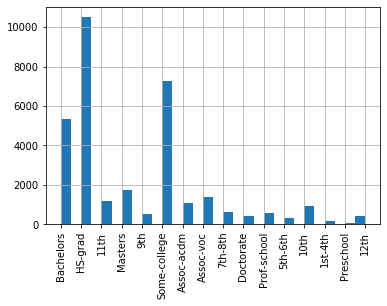

In [12]:
#4
%config IPCompleter.greedy=True
pass_data=pd.read_csv("adult.data", header=None, names=["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "50K"], skipinitialspace=True)
pass_data.education.hist(xrot=90, bins=30)


### Вопрос 5
Найти среднее и стандартное отклонение переменной "final weight" (fnlwgt) для разведённых людей?

In [6]:
#5
std=pass_data.groupby('marital-status')['fnlwgt'].std().Divorced
mad=pass_data.groupby('marital-status')['fnlwgt'].mad().Divorced
print("Стандартное:",std, "Финальное:",mad)

Стандартное: 105646.78945933616 Финальное: 75755.37971106575


### Вопрос 6
Правда ли, что люди, зарабатывающие более 50 тыс. в основном имеют высшее образование?

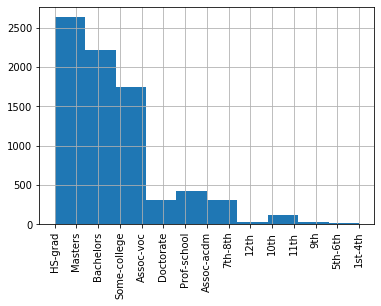

In [7]:
#6
fiftyAndOver=pass_data[pass_data['50K']=='>50K']
fiftyAndOver.education.hist(xrot=90);

### Вопрос 7
Каков максимальный возраст мужчин и женщин каждой расы?

In [8]:
#7
men=pass_data[pass_data['sex']=='Male'].groupby('race').max().age
women=pass_data[pass_data['sex']=='Female'].groupby('race').max().age
print("У мужчин: \n",men,"\n\nУ женщин: \n",women)

У мужчин: 
 race
Amer-Indian-Eskimo    82
Asian-Pac-Islander    90
Black                 90
Other                 77
White                 90
Name: age, dtype: int64 

У женщин: 
 race
Amer-Indian-Eskimo    80
Asian-Pac-Islander    75
Black                 90
Other                 74
White                 90
Name: age, dtype: int64


### Вопрос 8
Люди из каких стран работают как фермеры/рыбаки?

In [9]:
#8
farmers=pass_data[pass_data['occupation']=='Farming-fishing']['native-country'].unique();
farmers

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

### Вопрос 9
Рассмотрим два отношения 1) количество мужчин-бакалавров к количеству мужчин-магистров и 2) количество женщин-бакалавров к количеству женщин-магистров. Какое отношение больше?


In [10]:
#9
#для мужчин:
men=pass_data[pass_data['sex']=='Male']
menBachelors=men[men['education']=='Bachelors'].education.count()
menMasters=men[men['education']=='Masters'].education.count()
forMen=menMasters/menBachelors
print('Отношение для мужчин=',forMen)

#для женщин:
women=pass_data[pass_data['sex']=='Female']
womenBachelors=women[women['education']=='Bachelors'].education.count()
womenMasters=women[women['education']=='Masters'].education.count()
forWomen=womenMasters/womenBachelors
print('Отношение для женщин=',forWomen)

print(forWomen,'>',forMen)



Отношение для мужчин= 0.31771948608137046
Отношение для женщин= 0.33106856084002473
0.33106856084002473 > 0.31771948608137046


### Вопрос 10
Каково максимальное количество рабочих часов в неделю? Как много людей работают столько часов в неделю? Каков их заработок?

In [11]:
#10
maxHours=pass_data['hours-per-week'].max()
people=pass_data[pass_data['hours-per-week']==maxHours]['50K'].count();
fiftyk=pass_data[pass_data['hours-per-week']==maxHours]['50K']
print('Максимальное количество часов:', maxHours, '\nВсего таких людей:', people, '\nЗаработок: \n', fiftyk)

Максимальное количество часов: 99 
Всего таких людей: 85 
Заработок: 
 935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
         ...  
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: 50K, Length: 85, dtype: object
